## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Data Preprocessing

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


#### Dropping rows with null values

In [3]:
df = df.dropna() 

In [4]:
nulls_drop_count = df.isnull().sum()
print("\nThe number of null values after removing nulls are: \n")
print(nulls_drop_count)


The number of null values after removing nulls are: 

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64


In [5]:
df.describe()

,Amount
count,445.000000
mean,400.030742
std,2391.670112
min,2.000000
25%,30.000000
50%,63.000000
75%,166.000000
max,43000.000000


In [6]:
print("\nThe number of rows and columns in the cleaned dataset are: \n")
df.info()


The number of rows and columns in the cleaned dataset are: 

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 0 to 598
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            445 non-null    object 
 1   Mode            445 non-null    object 
 2   Category        445 non-null    object 
 3   Subcategory     445 non-null    object 
 4   Note            445 non-null    object 
 5   Amount          445 non-null    float64
 6   Income/Expense  445 non-null    object 
 7   Currency        445 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.3+ KB


In [7]:
print(df.count()) # Count of all non-null values in each column

Date              445
Mode              445
Category          445
Subcategory       445
Note              445
Amount            445
Income/Expense    445
Currency          445
dtype: int64


## Data Visualization

#### Plotting bar graphs for various columns in the data

Mode
Cash                     230
Saving Bank account 1    140
Credit Card               73
Debit Card                 2
Name: count, dtype: int64


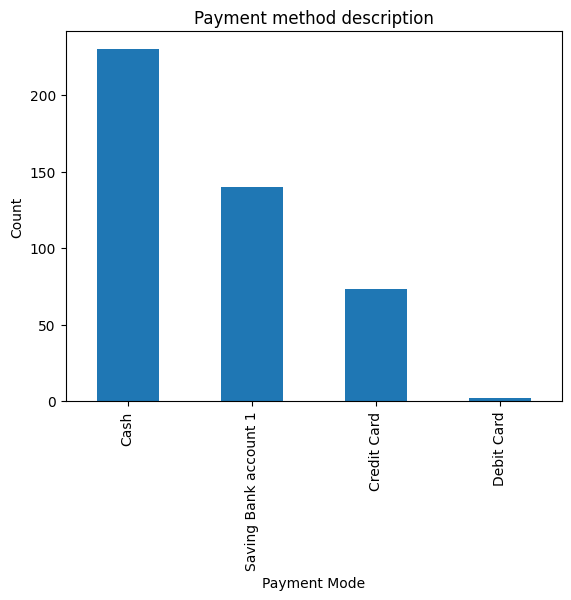

In [8]:
# plotting for payment mode of the transactions

payment_mode_counts = df['Mode'].value_counts()
print(payment_mode_counts)

payment_mode_counts.plot(kind='bar')
plt.title("Payment method description")
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

Category
Food              244
Transportation     61
Household          56
subscription       26
Health             20
Apparel            16
Beauty              5
Family              5
Culture             4
Festivals           3
Education           3
Tourism             1
Documents           1
Name: count, dtype: int64


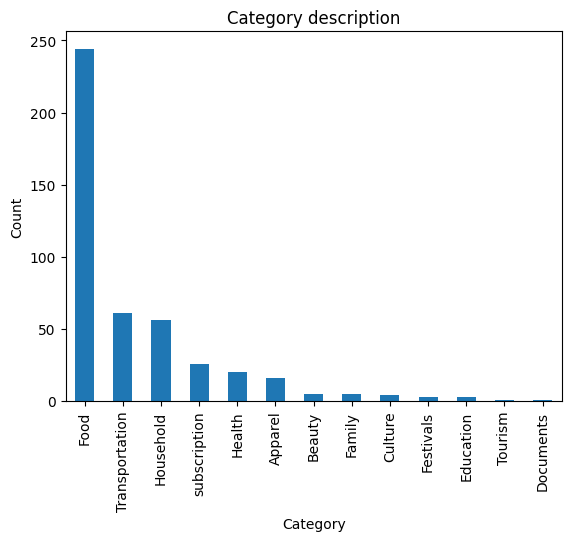

In [9]:
# plotting for category of transactions

category_counts = df['Category'].value_counts()
print(category_counts)

category_counts.plot(kind='bar')
plt.title('Category description')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Subcategory
Milk           57
snacks         39
Kirana         33
Lunch          22
auto           20
               ..
Accessories     1
makeup          1
Books           1
Holi            1
Courier         1
Name: count, Length: 61, dtype: int64


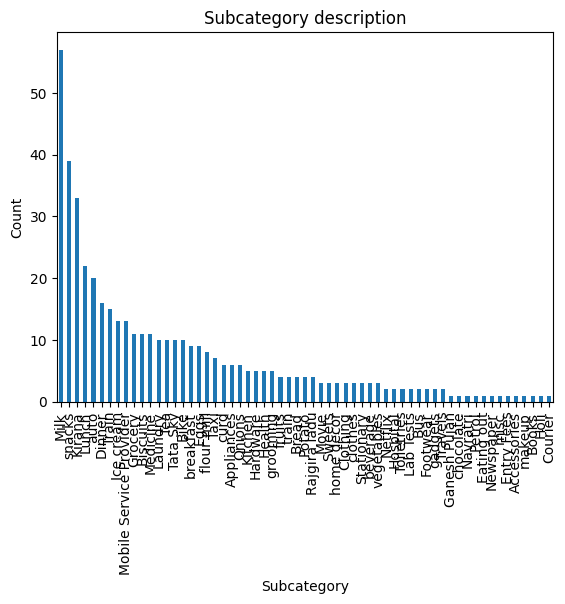

In [10]:
# plotting for the subcategory of transactions

subcategory_counts = df['Subcategory'].value_counts()
print(subcategory_counts)

subcategory_counts.plot(kind='bar')
plt.title('Subcategory description')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.show()


 Currency
INR    445
Name: count, dtype: int64 



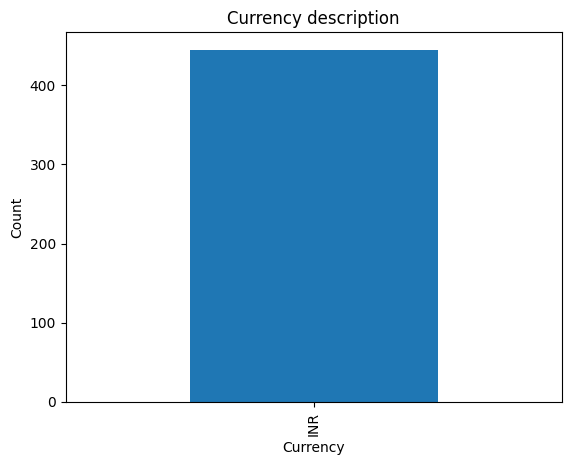

In [11]:
currency_count = df['Currency'].value_counts()
print('\n', currency_count, '\n')

currency_count.plot(kind='bar')
plt.title('Currency description')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

#### Pie chart for category and amounts respectively

Text(0.5, 1.0, 'Distribution of Amount by Category')

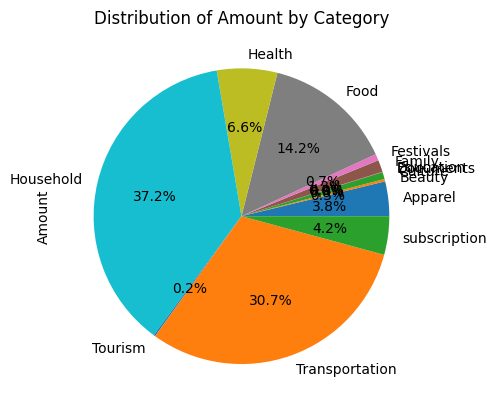

In [12]:
df.groupby('Category')['Amount'].sum().plot(kind='pie' , autopct='%1.1f%%')
plt.title("Distribution of Amount by Category")

## Applying K-Means Model

In [13]:
from sklearn.preprocessing import StandardScaler

selected_columns = ['Amount', 'Category', 'Subcategory']
data_selected = df[selected_columns]

In [14]:
data_encoded = pd.get_dummies(data_selected, columns=['Category', 'Subcategory'])

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df.head()

,Amount,Category_Apparel,Category_Beauty,Category_Culture,Category_Documents,Category_Education,Category_Family,Category_Festivals,Category_Food,Category_Health,...,Subcategory_flour mill,Subcategory_fruits,Subcategory_gadgets,Subcategory_grooming,Subcategory_home decor,Subcategory_makeup,Subcategory_misc,Subcategory_snacks,Subcategory_train,Subcategory_vegetables
0,-0.154891,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
1,-0.142333,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,0.907618,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,3.226493,-0.095238,-0.082385
2,-0.084149,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
3,-0.159495,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
4,-0.062383,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,12.138094,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385


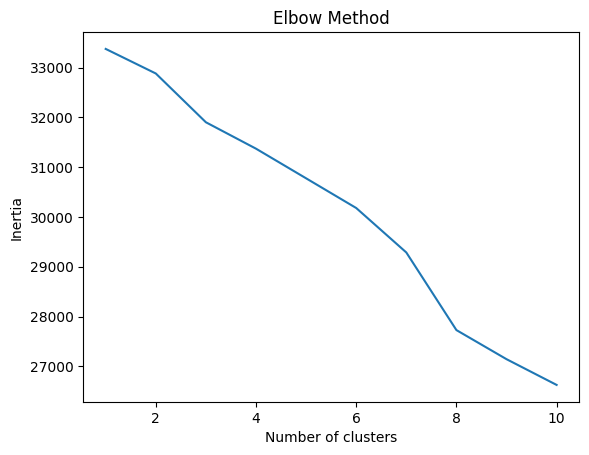

In [16]:
from sklearn.cluster import KMeans

inertia = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(data_scaled_df)

df['Cluster'] = kmeans.labels_
print(df.head())

                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  Cluster  
0        Expense      INR        1  
1        Expense      INR        1  
2        Expense      INR        1  
3        Expense      INR        6  
4        Expense     

#### Displaying the first five rows of each cluster

In [53]:
for cluster in range(optimal_clusters):
    print('Cluster: ', cluster)
    print(df[df['Cluster'] == cluster].head()) # 

Cluster:  0
                    Date                   Mode   Category Subcategory  \
198  29/06/2018 16:10:41                   Cash  Household     Kitchen   
263  19/05/2018 19:26:19                   Cash  Household     Kitchen   
340  19/04/2018 20:13:20                   Cash  Household     Kitchen   
351  15/04/2018 19:06:45            Credit Card  Household     Kitchen   
572  30/01/2018 21:05:31  Saving Bank account 1  Household     Kitchen   

                                  Note  Amount Income/Expense Currency  \
198                    Math tap repair    50.0        Expense      INR   
263                         flour mill    25.0        Expense      INR   
340                         flour mill    14.0        Expense      INR   
351  Vessels for sugar, coffee and tea   799.0        Expense      INR   
572              Matchbox packet 10pcs    10.0        Expense      INR   

     Cluster  
198        0  
263        0  
340        0  
351        0  
572        0  
Cluster: